In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [111]:
df.head(20)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [112]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [114]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [115]:
df.shape

(200, 5)

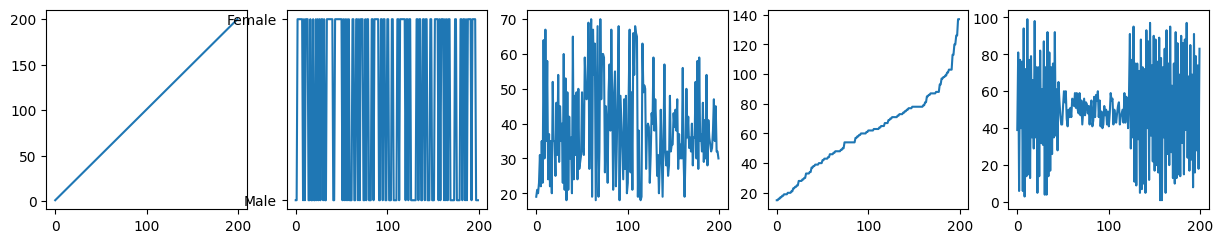

In [116]:
plt.figure(figsize = (15,15))
plt_num = 1
for i in df.columns:
  if plt_num <=5:
    plt.subplot(5,5,plt_num)
    plt.plot(df[i])
  plt_num +=1
plt.show()

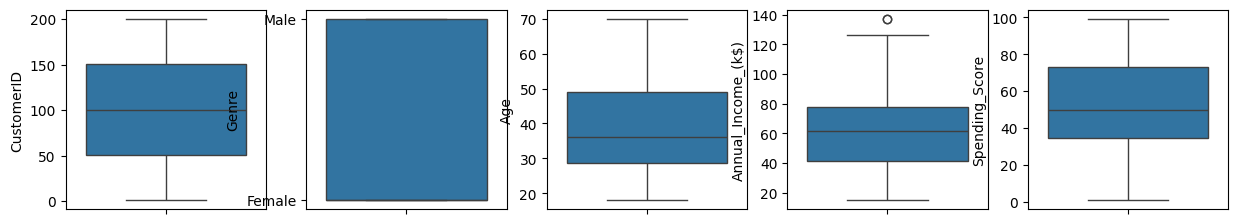

In [117]:
plt.figure(figsize = (15,15))
plt_num = 1
for i in df.columns:
  if plt_num <=5:
    plt.subplot(5,5,plt_num)
    sns.boxplot(df[i])
  plt_num +=1
plt.show()

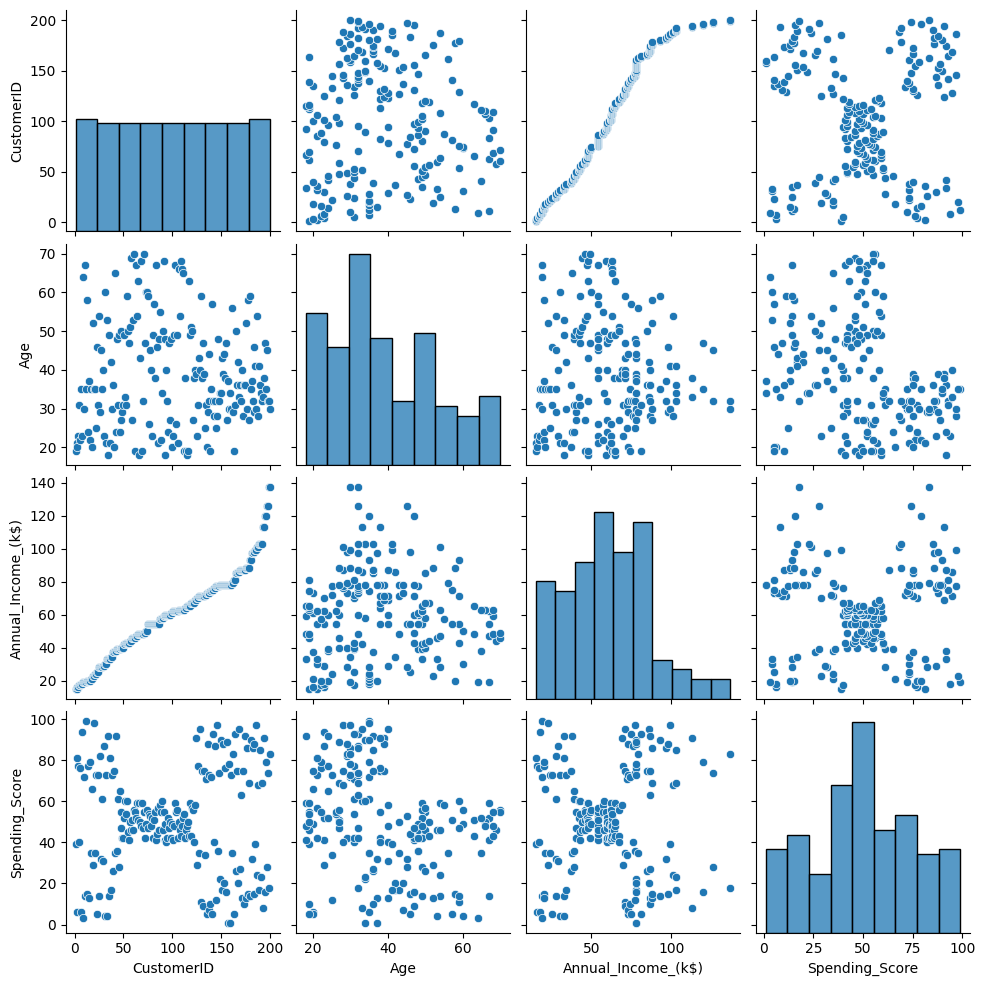

In [118]:
sns.pairplot(df)

In [119]:
df =  df.drop('CustomerID',axis = 1)

In [120]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df['Genre'] = lbl.fit_transform(df['Genre'])

In [144]:
from sklearn.cluster import DBSCAN
db  = DBSCAN(eps = 11,min_samples= 4,metric = 'euclidean')
model = db.fit(df)

In [145]:
label = model.labels_
label

array([-1,  0, -1,  0,  1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0, -1, -1,  1,  0,  2,  0,  2,  0,  1, -1,  1,  0,  2,  0,  2,  0,
        2,  0,  2,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  3, -1,  3,  0,  3, -1,  3, -1,  3, -1,  3,  4,  3,
       -1,  3,  4,  3, -1,  3, -1,  3,  4,  3, -1,  3, -1,  3,  5,  3,  5,
        3,  5,  3, -1,  3, -1,  3, -1,  3,  4,  3, -1,  3,  5,  3, -1, -1,
        5,  3,  5,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,
       -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [146]:
clust = len(set(label)) - (1 if -1 in label else 0)
print ('clusters:',clust)


clusters: 6


In [147]:
label.dtype

dtype('int64')

In [148]:
df['label'] = pd.DataFrame(y_pred)

In [149]:
df['label']

0     -1
1      0
2     -1
3      0
4      1
      ..
195   -1
196   -1
197   -1
198   -1
199   -1
Name: label, Length: 200, dtype: int64

In [150]:
df[df['label']==-1].count()

Genre                 62
Age                   62
Annual_Income_(k$)    62
Spending_Score        62
label                 62
dtype: int64

In [151]:
y_pred = db.fit_predict(df)

In [152]:
df1 = df.values

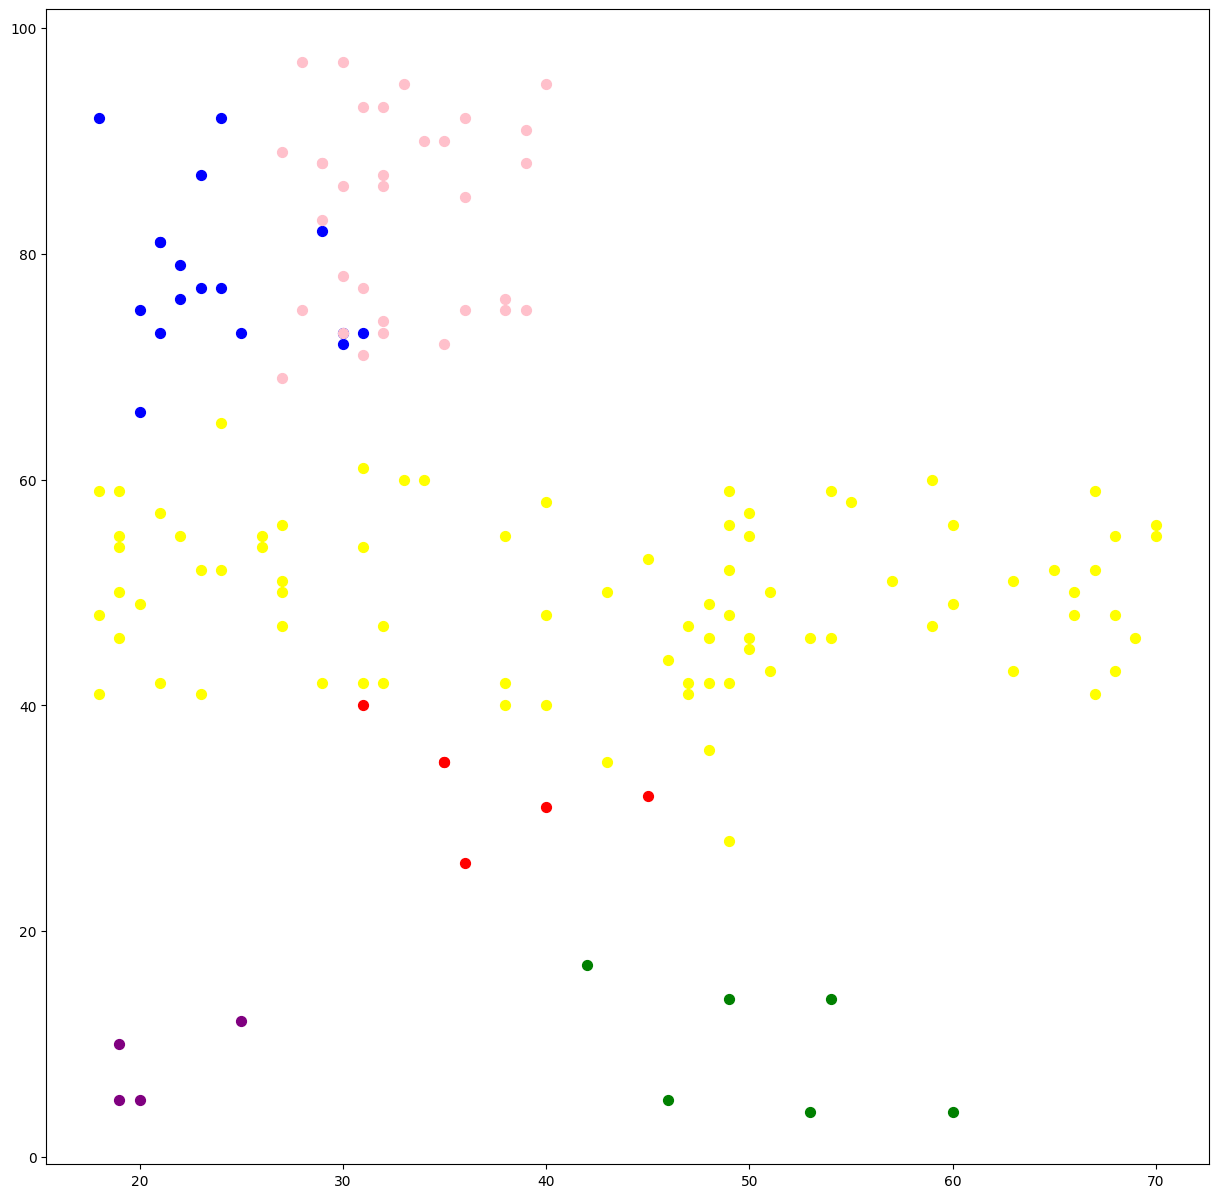

In [153]:
plt.figure(figsize = (15,15))
plt.scatter(df1[y_pred ==0,1],df1[y_pred ==0,3],label = 'clu-1',color = 'blue',s = 50)
plt.scatter(df1[y_pred ==1,1],df1[y_pred ==1,3],label = 'clu-2',color = 'red',s = 50)
plt.scatter(df1[y_pred ==2,1],df1[y_pred ==2,3],label = 'clu-3',color = 'green',s = 50)
plt.scatter(df1[y_pred ==3,1],df1[y_pred ==3,3],label = 'clu-4',color = 'yellow',s = 50)
plt.scatter(df1[y_pred ==4,1],df1[y_pred ==4,3],label = 'clu-5',color = 'pink',s = 50)
plt.scatter(df1[y_pred ==5,1],df1[y_pred ==5,3],label = 'clu-6',color = 'purple',s = 50)
plt.show()

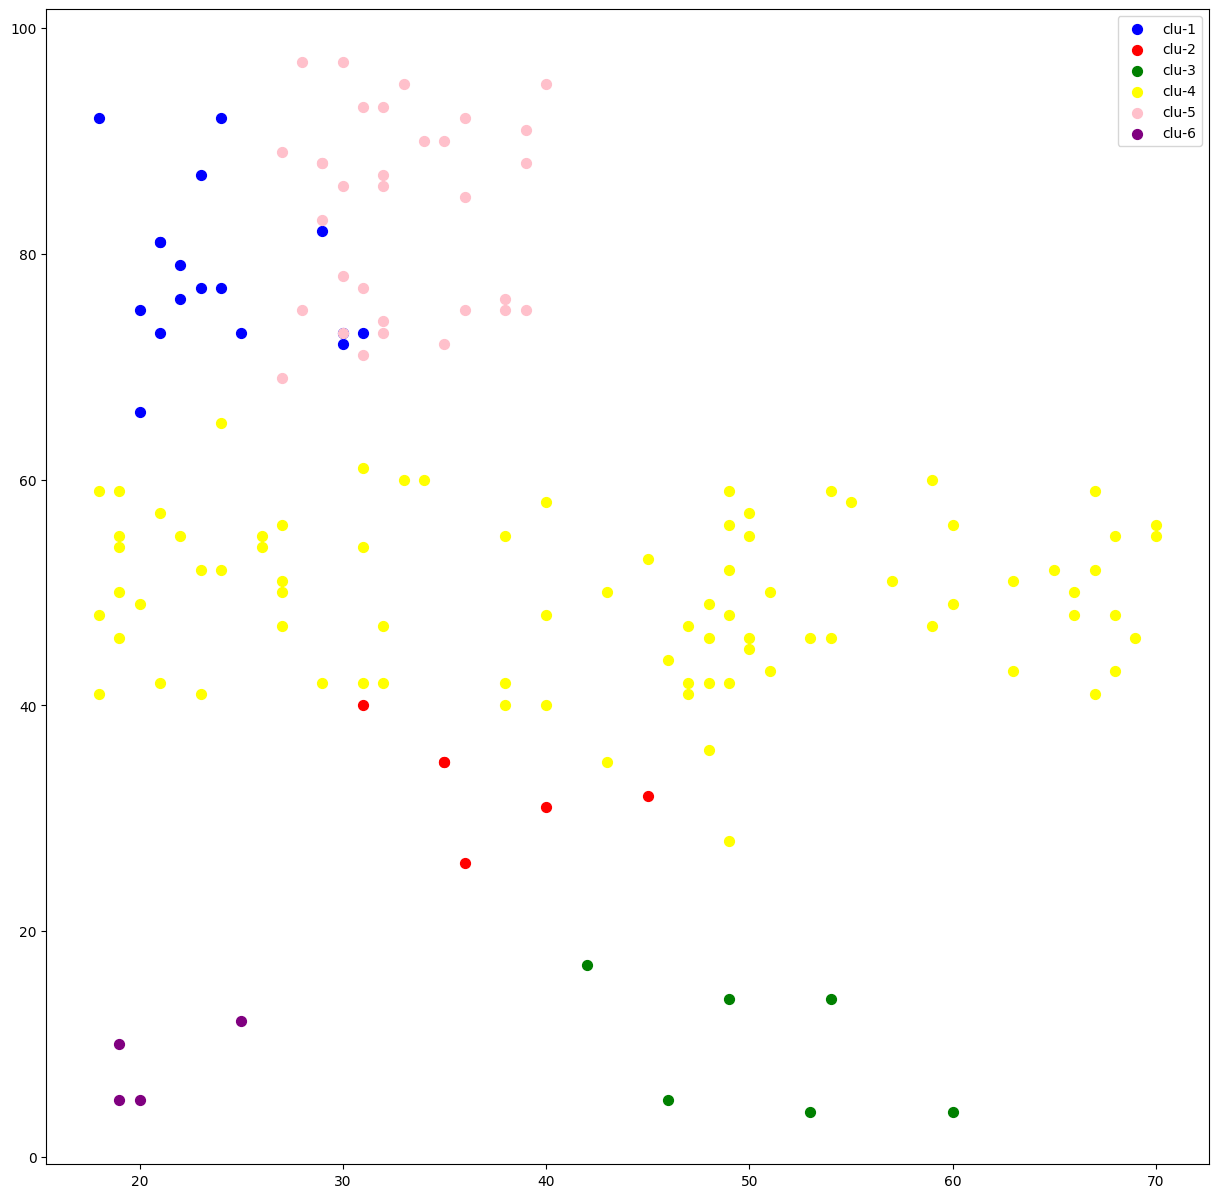

In [154]:
plt.figure(figsize=(15, 15))

colors = ['blue', 'red', 'green', 'yellow', 'pink', 'purple']

for i in range(6):
    plt.scatter(df1[y_pred == i, 1], df1[y_pred == i, 3], label=f'clu-{i+1}', color=colors[i], s=50)

plt.legend()
plt.show()
